In [1]:
from mist_ion import IonModel
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# Create a datetime object for particular date and time of the observation (you may use any other method)
dt_obs = datetime.strptime('2012-08-15 06:00', '%Y-%m-%d %H:%M')

# Create a model with basic parameters:
#   lat0, lon0, alt0 - position of the telescope
#   freq - frequency of observations in Hz
model = IonModel(lat0=79.433, lon0=-90.766, alt0=0, freq=45e6, dt=dt_obs)

# Create a grid of points for elevation and azimuth (you can also specify el_start, el_end, az_start, az_end in degrees)
model.generate_coord_grid(gridsize=50)

# Set up parameters of D layer. You can also specify d_bot and d_top as limits of the D layer in meters (6e4 and 9e4 meters by default). You can skip this step if you do not wish to calculate D layer
model.setup_dlayer(nlayers=10)

# Set up parameters of F layer. You can also specify f_bot and f_top in meters (1.5e5 and 5e5 meters by default). You can skip this step if you do not wish to calculate F layer
model.setup_flayer(nlayers=30)

# Start calculation with previously specified parameters. By default, this method calculates both D and F layers unless you specify explicitly which layer to calculate (layer = 'd' or layer = 'f'). You can also specify number of parallel processes to speed-up the calculation. progressbar=True shows progress in the real time.
model.calc(progressbar=True, processes=16)

F-layer: 100%|██████████| 2500/2500 [05:59<00:00,  6.95it/s]


In [2]:
# Saving model to file
model.save(dir='calc_results/', name='test_model')

# Loading model from file
loaded_model = IonModel.load('calc_results/test_model.h5')

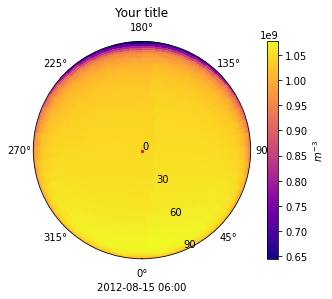

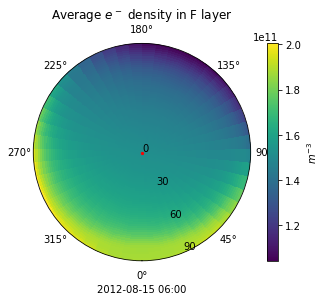

In [3]:
# Plotting distributions

dfig = loaded_model.plot_dedensity(title="Your title", cmap='plasma')
plt.show(dfig)

ffig = loaded_model.plot_fedensity()
plt.show(ffig)

In [4]:
# Saving plots
loaded_model.plot_dedensity(dir='pictures/', file='d_e_density.jpg', dpi=500)
loaded_model.plot_fedensity(dir='pictures', file='f_e_density', dpi=500)